In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from skimage.color import rgb2hsv
from sklearn.model_selection import train_test_split
from keras.layers import SpatialDropout2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle as pkl

Using TensorFlow backend.


In [2]:
targ_ = np.load(r'C:\Users\abels\Desktop\crowd_count\target.npy')

In [3]:
len(targ_)

4000

In [4]:
targ_[0:5]

array([35, 41, 41, 44, 41], dtype=uint8)

In [5]:
#target_input = np.zeros((2000,54))

In [6]:
#for x in range(0,len(targ_)):
#    target_input[x][targ_[x]] = 1

In [7]:
max_ = max(list(targ_))

In [15]:
input_layer_ = np.load(r'C:\Users\abels\Desktop\crowd_count\input_data.npy')

In [16]:
IMG_SIZE = input_layer_.shape[1]
IMG_SIZE2 = input_layer_.shape[2]

In [17]:
print (IMG_SIZE)
print (IMG_SIZE2)

480
640


In [19]:
model = Sequential()

#model.add(BatchNormalization())
#add batch normalization prior to convolution
#add dropout for the dense layer

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE2, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(228, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(SpatialDropout2D(0.2))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation = 'linear'))

model.add(Dense(512, activation = 'linear'))

#keras.layers.LeakyReLU(alpha=0.3

model.add(Dropout(0.2))

#model.add(Dropout(0.3))

model.add(Dense(54, activation = 'softmax'))

In [20]:
model.compile(optimizer='ADAM',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 478, 638, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 238, 318, 128)     16512     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 119, 159, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 118, 158, 128)     65664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 79, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 78, 228)      

In [22]:
input_layer_.shape

(4000, 480, 640)

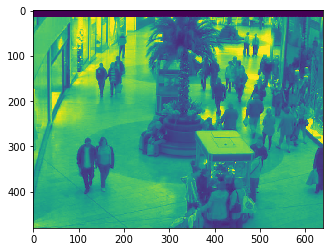

In [24]:
plt.imshow(input_layer_[3000])
plt.show()

In [25]:
targ_ = to_categorical(targ_)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(input_layer_, targ_, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(3200, 480, 640)

In [28]:
X_test.shape

(800, 480, 640)

In [29]:
y_train.shape

(3200, 54)

In [30]:
y_test.shape

(800, 54)

In [31]:
X_train = np.expand_dims(X_train, axis=4)
X_test = np.expand_dims(X_test, axis=4)

C:\Users\abels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.
C:\Users\abels\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [32]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [23]:
def data_Generator():
    while True:
        for i in range(0,len(X_train) // 32):
            yield  X_train[i*32:(i+1)*32], y_train[i*32:(i+1)*32]

In [24]:
model.fit_generator(data_Generator(), steps_per_epoch=1, epochs=1, verbose=1)

Epoch 1/1
1/1 [==============================] - 35s 35s/step - loss: 33.9894 - accuracy: 0.0312
